# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values="?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [3]:
data.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [4]:
print(data.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [5]:
data = data.dropna(subset=["workclass"])

In [6]:
data.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          7
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    556
income              0
dtype: int64

In [36]:
capital_gain=(data["capital-gain"] > 0).value_counts()
capital_gain

capital-gain
False    28129
True      2589
Name: count, dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30718 non-null  int64 
 1   workclass       30718 non-null  object
 2   fnlwgt          30718 non-null  int64 
 3   education       30718 non-null  object
 4   education-num   30718 non-null  int64 
 5   marital-status  30718 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    30718 non-null  object
 8   race            30718 non-null  object
 9   sex             30718 non-null  object
 10  capital-gain    30718 non-null  int64 
 11  capital-loss    30718 non-null  int64 
 12  hours-per-week  30718 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30718 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### O sa iau variabilele ordinale si o sa vad ce fel de raspunsuri au ca sa imi fac o idee de cum arata cum as putea sa le encodez si pe care as putea sa le pastrez astfel incat sa fie relevante pentru modelul meu.
Tot odata tabelul describe de mai sus imi arata ca variabilele capital-gain	capital-loss au foarte multe valori de 0, o abatere standard foarte mare de 7385 respectiv 402 fapt care ma face sa ma gandesc ca ar ajuta sa nu le implic in model


In [25]:
df_encoded = data.drop(columns=["fnlwgt", "education", "capital-loss", "capital-gain", "native-country","marital-status", "occupation"])


In [26]:
df_encoded.isna().sum()

age               0
workclass         0
education-num     0
relationship      0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64

In [27]:
df_encoded.head()

age         workclass  education-num   relationship   race     sex  \
0   39         State-gov             13  Not-in-family  White    Male   
1   50  Self-emp-not-inc             13        Husband  White    Male   
2   38           Private              9  Not-in-family  White    Male   
3   53           Private              7        Husband  Black    Male   
4   28           Private             13           Wife  Black  Female   

   hours-per-week income  
0              40  <=50K  
1              13  <=50K  
2              40  <=50K  
3              40  <=50K  
4              40  <=50K

In [10]:
data["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [11]:
data["marital-status"].value_counts()

marital-status
Married-civ-spouse       14340
Never-married             9917
Divorced                  4259
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: count, dtype: int64

In [12]:
data["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [13]:
data["relationship"].value_counts()

relationship
Husband           12704
Not-in-family      7866
Own-child          4530
Unmarried          3271
Wife               1436
Other-relative      918
Name: count, dtype: int64

In [47]:
data["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [53]:
data["race"].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [28]:
df_encoded = pd.get_dummies(df_encoded, columns=["income", "sex"], prefix=["income", "sex"], drop_first=True)

df_encoded["income_>50K"] = df_encoded["income_>50K"].astype(int)
df_encoded["sex_Male"] = df_encoded["sex_Male"].astype(int)
df_encoded.head()

age         workclass  education-num   relationship   race  hours-per-week  \
0   39         State-gov             13  Not-in-family  White              40   
1   50  Self-emp-not-inc             13        Husband  White              13   
2   38           Private              9  Not-in-family  White              40   
3   53           Private              7        Husband  Black              40   
4   28           Private             13           Wife  Black              40   

   income_>50K  sex_Male  
0            0         1  
1            0         1  
2            0         1  
3            0         1  
4            0         0

In [29]:
df_encoded = pd.get_dummies(df_encoded, columns=["workclass"], prefix="workclass", drop_first=True)
df_encoded.head()

age  education-num   relationship   race  hours-per-week  income_>50K  \
0   39             13  Not-in-family  White              40            0   
1   50             13        Husband  White              13            0   
2   38              9  Not-in-family  White              40            0   
3   53              7        Husband  Black              40            0   
4   28             13           Wife  Black              40            0   

   sex_Male  workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0         1                False                   False              False   
1         1                False                   False              False   
2         1                False                   False               True   
3         1                False                   False               True   
4         0                False                   False               True   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                   False                       False                 True   
1                   False                        True                False   
2                   False                       False                False   
3                   False                       False                False   
4                   False                       False                False   

   workclass_Without-pay  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

In [30]:
df_encoded = pd.get_dummies(df_encoded, columns=["relationship"], prefix="relationship", drop_first=True)
df_encoded.head()

age  education-num   race  hours-per-week  income_>50K  sex_Male  \
0   39             13  White              40            0         1   
1   50             13  White              13            0         1   
2   38              9  White              40            0         1   
3   53              7  Black              40            0         1   
4   28             13  Black              40            0         0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                   False                       False                 True   
1                   False                        True                False   
2                   False                       False                False   
3                   False                       False                False   
4                   False                       False                False   

   workclass_Without-pay  relationship_Not-in-family  \
0                  False                        True   
1                  False                       False   
2                  False                        True   
3                  False                       False   
4                  False                       False   

   relationship_Other-relative  relationship_Own-child  \
0                        False                   False   
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   

   relationship_Unmarried  relationship_Wife  
0                   False              False  
1                   False              False  
2                   False              False  
3                   False              False  
4                   False               True

In [31]:
df_encoded = pd.get_dummies(df_encoded, columns=["race"], prefix="race", drop_first=True)
df_encoded.head()

age  education-num  hours-per-week  income_>50K  sex_Male  \
0   39             13              40            0         1   
1   50             13              13            0         1   
2   38              9              40            0         1   
3   53              7              40            0         1   
4   28             13              40            0         0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0                   False                       False  ...   
1                   False                        True  ...   
2                   False                       False  ...   
3                   False                       False  ...   
4                   False                       False  ...   

   workclass_Without-pay  relationship_Not-in-family  \
0                  False                        True   
1                  False                       False   
2                  False                        True   
3                  False                       False   
4                  False                       False   

   relationship_Other-relative  relationship_Own-child  \
0                        False                   False   
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                   False              False                    False   
1                   False              False                    False   
2                   False              False                    False   
3                   False              False                    False   
4                   False               True                    False   

   race_Black  race_Other  race_White  
0       False       False        True  
1       False       False        True  
2       False       False        True  
3        True       False       False  
4        True       False       False  

[5 rows x 21 columns]

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df_encoded.columns

Index(['age', 'education-num', 'occupation', 'hours-per-week', 'income_>50K',
       'sex_Male', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'],
      dtype='object')

In [33]:
df_encoded[['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
'workclass_Self-emp-not-inc', 'workclass_State-gov',
'workclass_Without-pay', 'relationship_Not-in-family',
'relationship_Other-relative', 'relationship_Own-child',
'relationship_Unmarried', 'relationship_Wife',
'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White']] = df_encoded[['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
'workclass_Self-emp-not-inc', 'workclass_State-gov',
'workclass_Without-pay', 'relationship_Not-in-family',
'relationship_Other-relative', 'relationship_Own-child',
'relationship_Unmarried', 'relationship_Wife',
'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White'
]].astype(int)
df_encoded.head()

age  education-num  hours-per-week  income_>50K  sex_Male  \
0   39             13              40            0         1   
1   50             13              13            0         1   
2   38              9              40            0         1   
3   53              7              40            0         1   
4   28             13              40            0         0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                    0                       0                  0   
1                    0                       0                  0   
2                    0                       0                  1   
3                    0                       0                  1   
4                    0                       0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0                       0                           0  ...   
1                       0                           1  ...   
2                       0                           0  ...   
3                       0                           0  ...   
4                       0                           0  ...   

   workclass_Without-pay  relationship_Not-in-family  \
0                      0                           1   
1                      0                           0   
2                      0                           1   
3                      0                           0   
4                      0                           0   

   relationship_Other-relative  relationship_Own-child  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                       0                  0                        0   
1                       0                  0                        0   
2                       0                  0                        0   
3                       0                  0                        0   
4                       0                  1                        0   

   race_Black  race_Other  race_White  
0           0           0           1  
1           0           0           1  
2           0           0           1  
3           1           0           0  
4           1           0           0  

[5 rows x 21 columns]

In [38]:
from sklearn.preprocessing import LabelEncoder
data_1=data

encoder = LabelEncoder()
data_1["workclass_encoded"] = encoder.fit_transform(data_1["workclass"]) +1

data_1[["workclass", "workclass_encoded"]].value_counts()

workclass         workclass_encoded
Private           4                    22696
Self-emp-not-inc  6                     2541
Local-gov         2                     2093
State-gov         7                     1298
Self-emp-inc      5                     1116
Federal-gov       1                      960
Without-pay       8                       14
Never-worked      3                        7
Name: count, dtype: int64

In [37]:
encoder = LabelEncoder()
data_1["occupation_encoded"] = encoder.fit_transform(data_1["occupation"]) +1
data_1[["occupation", "occupation_encoded"]].value_counts()

occupation         occupation_encoded
Prof-specialty     10                    4140
Craft-repair       3                     4099
Exec-managerial    4                     4066
Adm-clerical       1                     3770
Sales              12                    3650
Other-service      8                     3295
Machine-op-inspct  7                     2002
Transport-moving   14                    1597
Handlers-cleaners  6                     1370
Farming-fishing    5                      994
Tech-support       13                     928
Protective-serv    11                     649
Priv-house-serv    9                      149
Armed-Forces       2                        9
Name: count, dtype: int64

In [39]:
correlation_value = data_1["occupation_encoded"].corr(data_1["workclass_encoded"])
print(correlation_value)

0.010677552944232975


####Am realizat acest test de corelație pentru a evalua relația dintre cele două variabile. Valoarea corelației de 0.01(cu datele curatate ) indică o asociere slabă, ceea ce sugerează că cele două variabile nu sunt foarte strâns legate. Acest rezultat arată că variabilele nu transmit exact aceeași informație și nu există un risc semnificativ de colinearitate. Prin urmare, ambele variabile ar putea fi incluse în model fără a afecta negativ performanța acestuia.

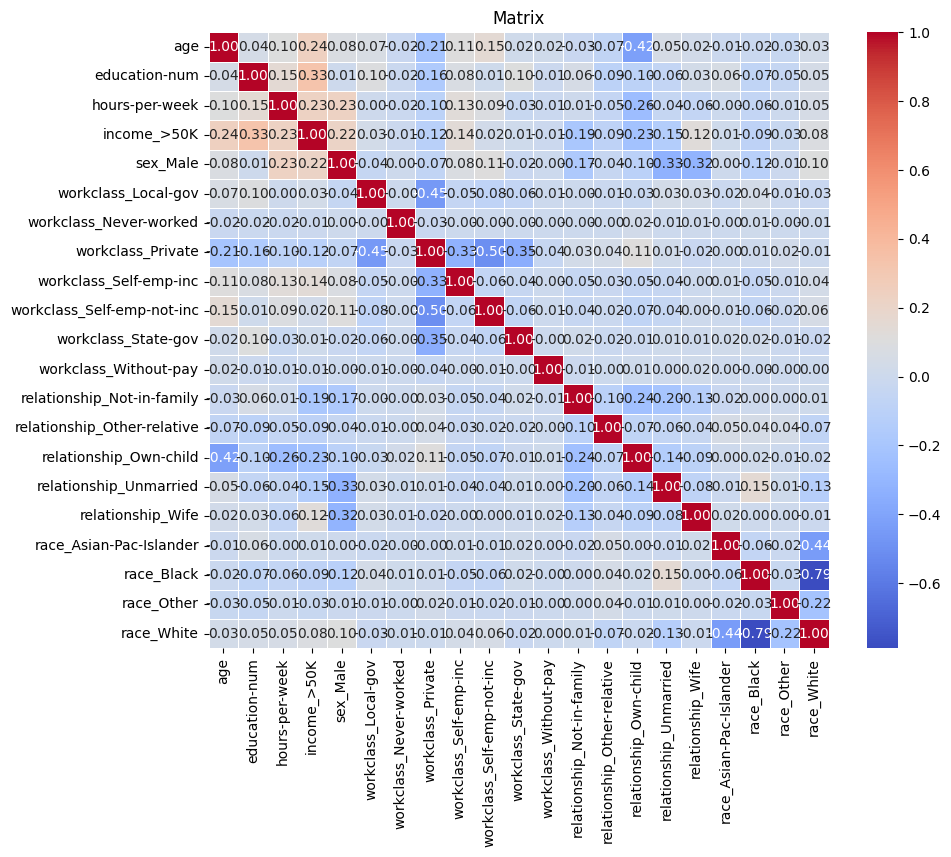

In [40]:
correlation_matrix = df_encoded.corr()

# Creăm heatmap-ul
plt.figure(figsize=(10, 8))  # Dimensiunea figurii
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titlu
plt.title("Matrix")
plt.show()